<a href="https://colab.research.google.com/github/manjunath-hanmantgad/python-development/blob/master/Handling_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 7.1 MB/s eta 0:00:00


In [ ]:
# data is downloaded from : https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/

In [2]:
ls

crx.data  sample_data/


In [3]:
# library import
import random
import pandas as pd
import numpy as np

In [4]:
# import data 
data = pd.read_csv('/content/crx.data' , header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [5]:
data.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
# code to add random missing values at random positions

# creating variable names to replace the existing column names
# with the name as A1 , A2 , A3 and so on till A16.
var_1 = [f"A{s}" for s in range(1,17)] # bcoz 16 is number of columns
# add this variable name to df 
data.columns = var_1
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [8]:
data = data.replace("?", np.nan)

#cast numerical variables as float data types
data["A2"] = data["A2"].astype("float")
data["A14"] = data["A14"].astype("float")

# encode target variable as binary
data["A16"] = data["A16"].map({"+":1, "-":0})

# rename target variable 
data.rename(columns={"A16":"target"}, inplace=True)

In [10]:
# add missing values at random positions in 4 variables
random.seed(42)

values = list(set([random.randint(0, len(data)) for p in range(0, 100)]))

data.loc[values, ["A3", "A8", "A9", "A10"]] = np.nan

# then save the prepared data
data.to_csv("prepared_data_for_test.csv", index=False)


### Removing Observations with Missing data

**Complete Case Analysis (CCA)**, also called list-wise deletion of cases, consists of discarding observations with missing data. CCA can be applied to both categorical and numerical variables.

In [11]:
# when can it be applied
'''
1. data is missing at random
2. small number of data is missing
3. if large number of observations are missing then CCA 
will lead to removal of large portion of data
'''

'\n1. data is missing at random\n2. small number of data is missing\n3. if large number of observations are missing then CCA \nwill lead to removal of large portion of data\n'

In [12]:
import matplotlib.pyplot as plt

data = pd.read_csv('/content/prepared_data_for_test.csv')
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,NaN,u,g,c,v,NaN,NaN,NaN,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      600 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      600 non-null    float64
 8   A9      600 non-null    object 
 9   A10     600 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  target  690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


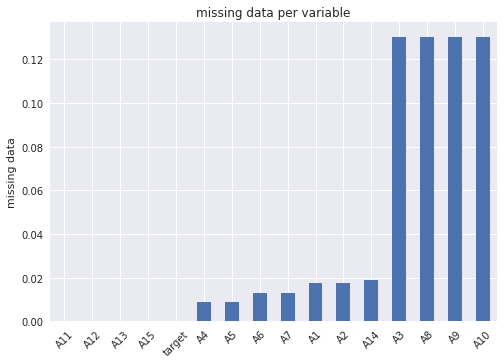

In [15]:
# sort the values in ascending order and ake bar plot

with plt.style.context("seaborn"):
  data.isnull().mean().sort_values(ascending=True).plot.bar(rot=45)
  plt.ylabel("missing data")
  plt.title("missing data per variable")

In [17]:
# removing observations if missing values are present
data_1 = data.dropna()

# then compare how many observations are present 
# in data and data_1

print(f"total observations:, {len(data)}")
print(f"number of observations without missing data:{len(data_1)}")

total observations:, 690
number of observations without missing data:565


In [18]:
# now to drop the data
from feature_engine.imputation import DropMissingData

# setup imputer to find variables (A1..A15) with missing data

cca_1 = DropMissingData(variables=None, missing_only=True)

# fit the transformer on the data to implement this

cca_1.fit(data)

# now inspect the variables with missing data

cca_1.variables_

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A14']

In [19]:
# remove observations with missing data from above query 

data_1 = cca_1.transform(data)
data_1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,40.58,3.290,u,g,m,v,3.50,f,f,0,t,s,400.0,0,0
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [20]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      565 non-null    object 
 1   A2      565 non-null    float64
 2   A3      565 non-null    float64
 3   A4      565 non-null    object 
 4   A5      565 non-null    object 
 5   A6      565 non-null    object 
 6   A7      565 non-null    object 
 7   A8      565 non-null    float64
 8   A9      565 non-null    object 
 9   A10     565 non-null    object 
 10  A11     565 non-null    int64  
 11  A12     565 non-null    object 
 12  A13     565 non-null    object 
 13  A14     565 non-null    float64
 14  A15     565 non-null    int64  
 15  target  565 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 75.0+ KB


### Mean or Median imputation

In [21]:
# mean or median is caluclated using train set only.
# then these values are used to impute to train and test set.

In [22]:
# mean imputation must be used if data is normally distributed
# else use median distriubtion

from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from feature_engine.imputation import MeanMedianImputer 

In [23]:
# load dataset 

data_2 = pd.read_csv('/content/prepared_data_for_test.csv')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      600 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      600 non-null    float64
 8   A9      600 non-null    object 
 9   A10     600 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  target  690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


In [24]:
# separate to train and test data
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("target", axis=1),
    data["target"],
    test_size=0.25,
    random_state=42)

In [28]:
print(f"shape of X_train: {len(X_train)}")
print(f"shape of X_test: {len(X_test)}")
print(f"shape of y_train: {len(y_train)}")
print(f"shape of y_test: {len(y_test)}")

shape of X_train: 517
shape of X_test: 173
shape of y_train: 517
shape of y_test: 173


In [29]:
# put numercial variables into a list 

numericals = X_train.select_dtypes(exclude="O").columns.to_list()

In [30]:
numericals

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

In [31]:
# capture them into a dictionary 
# capture the median values of numercials and add it to dictionary
# using to_dict()

medians = X_train[numericals].median().to_dict()
medians

{'A2': 28.58, 'A3': 3.0, 'A8': 1.0, 'A11': 0.0, 'A14': 160.0, 'A15': 7.0}

In [33]:
# replace missing data with median

X_train = X_train.fillna(value=medians)
X_test = X_test.fillna(value=medians)

#print(f"Now shape of X_train and X_test: , {len(X_train), len(X_test)}")

Now shape of X_train and X_test: , (517, 173)


In [34]:
# the non numerical variables in list 
remaining_numericals = [var for var in X_train.columns if 
                        var not in numericals]
remaining_numericals

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [35]:
# setup imputer to replace missing date with median 

imputer = SimpleImputer(strategy="median")
imputer

SimpleImputer(strategy='median')

In [36]:
# add the imputer class

ct = ColumnTransformer([("imputer", imputer,
                         numericals)],
                       remainder = "passthrough")
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(strategy='median'),
                                 ['A2', 'A3', 'A8', 'A11', 'A14', 'A15'])])

In [37]:
# fit the imputer 

ct.fit(X_train)

# inspect the learned median values 

ct.named_transformers_.imputer.statistics_

array([ 28.58,   3.  ,   1.  ,   0.  , 160.  ,   7.  ])

The above returned median values array.

In [38]:
# now replace mising values with median

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

# imputer returns a numpy array but we need a dataframe 

X_train = pd.DataFrame(X_train , columns=numericals + remaining_numericals)
X_train

,A2,A3,A8,A11,A14,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,24.08,9.0,0.25,0.0,0.0,0.0,b,u,g,aa,v,f,f,t,g
1,32.0,3.0,1.0,0.0,393.0,0.0,b,y,p,e,h,NaN,NaN,t,g
2,43.17,5.0,2.25,0.0,141.0,0.0,b,u,g,i,bb,f,f,t,g
3,20.08,3.0,1.0,0.0,200.0,0.0,b,u,g,q,v,NaN,NaN,f,g
4,21.83,3.0,1.0,0.0,356.0,0.0,b,u,g,k,v,NaN,NaN,t,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,34.83,3.0,1.0,0.0,160.0,0.0,b,u,g,d,bb,NaN,NaN,t,g
513,28.75,1.165,0.5,0.0,280.0,0.0,b,u,g,k,v,t,f,f,s
514,37.58,3.0,1.0,0.0,160.0,0.0,b,NaN,NaN,NaN,NaN,NaN,NaN,f,p
515,19.0,0.0,0.0,4.0,45.0,1.0,b,y,p,ff,ff,f,t,f,g


In [40]:
# performing median imputation 

'''
1. split the data into train and test
'''

imputer = MeanMedianImputer(imputation_method="median",
                            variables=numericals)

# fit the imputer to start training or start learning 

imputer.fit(X_train) 

# inspect learned medians 

imputer.imputer_dict_

TypeError: ignored

In [41]:
# replace the missing values with median 

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

NotFittedError: ignored

### Imputing categorical variables

In [42]:
'''
Using:
1. most frequent category or with an arbitary string.
- estimate frequent category using train and test set
then impute values in train test and future datasets.
'''

'\nUsing:\n1. most frequent category or with an arbitary string.\n- estimate frequent category using train and test set\nthen impute values in train test and future datasets.\n'

In [43]:
from feature_engine.imputation import CategoricalImputer

In [46]:
# load dataset
data = pd.read_csv('/content/prepared_data_for_test.csv')

# separate into train and test 

X_train,X_test,y_train,y_test = train_test_split(
    data.drop("target", axis=1),
    data["target"],
    test_size=0.25,
    random_state=42
)

print(f"shape of X_train: , {len(X_train)}")
print(f"shape of X_test: , {len(X_test)}")
print(f"shape of y_train: , {len(y_train)}")
print(f"shape of y_test: , {len(y_test)}")

shape of X_train: , 517
shape of X_test: , 173
shape of y_train: , 517
shape of y_test: , 173


In [48]:
# categorical variables 

categorical_vars = X_train.select_dtypes(include="O").columns.to_list()
categorical_vars

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [49]:
# call out most frequent category per categorical variable into a dictionary

frequent_vars = X_train[categorical_vars].mode().iloc[0].to_dict()
frequent_vars


{'A1': 'b',
 'A4': 'u',
 'A5': 'g',
 'A6': 'c',
 'A7': 'v',
 'A9': 't',
 'A10': 'f',
 'A12': 'f',
 'A13': 'g'}

In [51]:
# then replace missing values with frequent categories 

X_train = X_train.fillna(value=frequent_vars)

X_test = X_test.fillna(value=frequent_vars)

In [52]:
X_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
647,b,24.08,9.000,u,g,aa,v,0.250,f,f,0,t,g,0.0,0
163,b,32.00,NaN,y,p,e,h,NaN,t,f,0,t,g,393.0,0
380,b,43.17,5.000,u,g,i,bb,2.250,f,f,0,t,g,141.0,0
603,b,20.08,NaN,u,g,q,v,NaN,t,f,0,f,g,200.0,0
432,b,21.83,NaN,u,g,k,v,NaN,t,f,0,t,g,356.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,b,34.83,NaN,u,g,d,bb,NaN,t,f,0,t,g,NaN,0
106,b,28.75,1.165,u,g,k,v,0.500,t,f,0,f,s,280.0,0
270,b,37.58,NaN,u,g,c,v,NaN,t,f,0,f,p,NaN,0
435,b,19.00,0.000,y,p,ff,ff,0.000,f,t,4,f,g,45.0,1


In [53]:
# replace missing data with specific string 
# create imputation dict with categorical names as keys
# random string as values 

imputation_dict = {var:"no_data" for var in categorical_vars}
imputation_dict

{'A1': 'no_data',
 'A4': 'no_data',
 'A5': 'no_data',
 'A6': 'no_data',
 'A7': 'no_data',
 'A9': 'no_data',
 'A10': 'no_data',
 'A12': 'no_data',
 'A13': 'no_data'}

In [54]:
# list with numerical variables 

imputer = SimpleImputer(strategy='most_frequent')

In [55]:
ct = ColumnTransformer(

    [("imputer",imputer, categorical_vars)],

    remainder="passthrough"

    )

In [56]:
# now fit

ct.fit(X_train)

# and then inspect 

ct.named_transformers_.imputer.statistics_

array(['b', 'u', 'g', 'c', 'v', 't', 'f', 'f', 'g'], dtype=object)

In [57]:
# repalce the missing values with frequent categories 

X_train = ct.transform(X_train)

X_test = ct.transform(X_test)

### Finding extreme values for imputation

In [58]:
# end of tail or extreme value imputation is 
# not suitable for linear models as this will 
# distort the distribution of data.

In [59]:
from feature_engine.imputation import EndTailImputer

In [60]:
data = pd.read_csv('/content/prepared_data_for_test.csv')

numeric_vars = [var for var in data.select_dtypes(exclude="O").columns.to_list()
if var!="target"]
                

In [61]:
numeric_vars

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(
    data[numeric_vars],
    data["target"],
    random_state=42
)

In [64]:
# IQR for all numerical variables 

IQR = X_train.quantile(0.75) - X_train.quantile(0.25)
IQR 
# pandas series 

A2      15.00000
A3       6.30125
A8       2.34500
A11      3.00000
A14    199.00000
A15    400.00000
dtype: float64

In [65]:
# dictionary with variable name as keys and
# imputation replacements as values 

imputation_dict = (X_train.quantile(0.75) + 1.5 * IQR).to_dict()
imputation_dict

{'A2': 60.25,
 'A3': 16.951875,
 'A8': 6.0275,
 'A11': 7.5,
 'A14': 570.5,
 'A15': 1000.0}

In [66]:
X_train = X_train.fillna(value=imputation_dict)

X_test = X_test.fillna(value=imputation_dict)

In [68]:
# now setup imputer to find value of right distribution using IQR rule

imputer = EndTailImputer(
    imputation_method="iqr",
    tail="right",
    fold=3,
    variables=None
)
imputer

EndTailImputer(imputation_method='iqr')

In [69]:
# now fit

imputer.fit(X_train)

# and inspect learned / trained / fitted values 

imputer.imputer_dict_

{'A2': 85.19000000000001,
 'A3': 39.755,
 'A8': 19.25,
 'A11': 12.0,
 'A14': 880.0,
 'A15': 1600.0}

In [70]:
X_train = imputer.transform(X_train)

X_test = imputer.transform(X_test)